In [94]:
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [97]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [98]:
df = df.drop(['customer_id'],axis='columns')

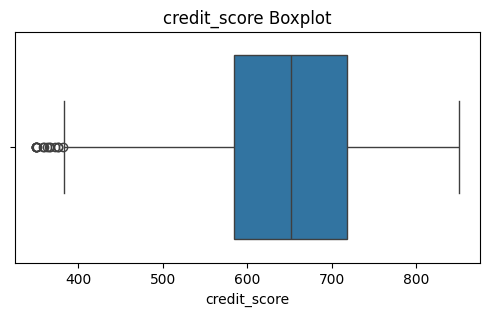

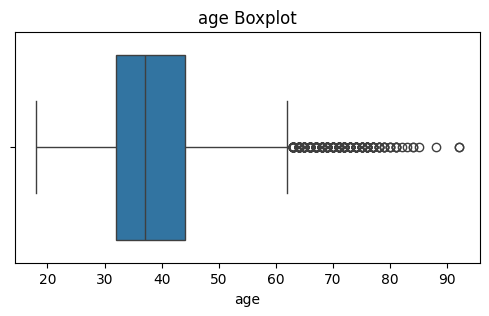

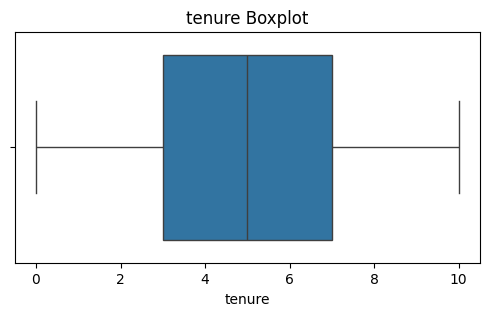

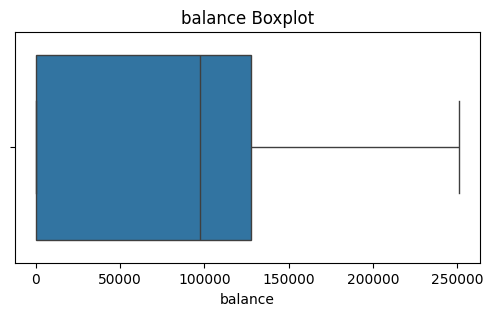

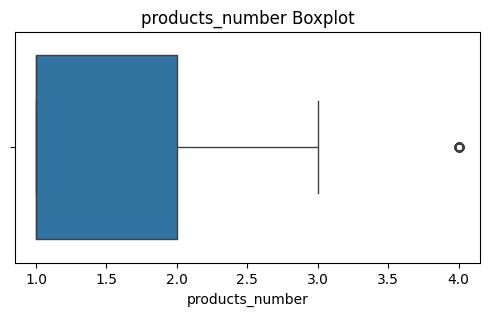

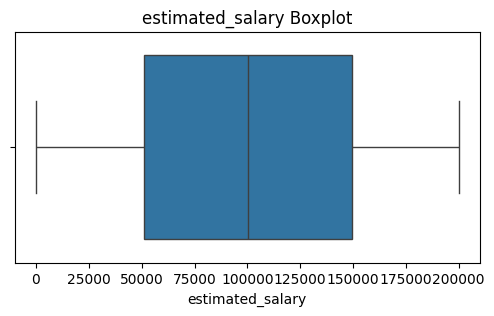

In [99]:
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

numeric_cols = ['credit_score','age','tenure','balance','products_number','estimated_salary']
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.show()


In [100]:
df.head(3)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [101]:
from scipy import stats

z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = (z_scores > 3)  # z > 3 considered extreme
print("Number of outliers per column:")
print(np.sum(outliers, axis=0))


Number of outliers per column:
[  8 133   0   0  60   0]


In [102]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))
    print(f"{col} Outliers count: {outlier_condition.sum()}")


credit_score Outliers count: 15
age Outliers count: 359
tenure Outliers count: 0
balance Outliers count: 0
products_number Outliers count: 60
estimated_salary Outliers count: 0


In [103]:
# Example: Cap balance
Q1 = df['credit_score'].quantile(0.25)
Q3 = df['credit_score'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outlier_condition = (df['credit_score'] < lower) | (df['credit_score'] > upper)

# Drop the outlier rows
df = df[~outlier_condition]


In [104]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))
    print(f"{col} Outliers count: {outlier_condition.sum()}")


credit_score Outliers count: 0
age Outliers count: 359
tenure Outliers count: 0
balance Outliers count: 0
products_number Outliers count: 59
estimated_salary Outliers count: 0


In [105]:
df.age.describe()

count    9985.000000
mean       38.915173
std        10.487483
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: age, dtype: float64

In [106]:
# Example: Cap balance
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outlier_condition = (df['age'] < lower) | (df['age'] > upper)

# Drop the outlier rows
df = df[~outlier_condition]


In [107]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))
    print(f"{col} Outliers count: {outlier_condition.sum()}")


credit_score Outliers count: 1
age Outliers count: 166
tenure Outliers count: 0
balance Outliers count: 0
products_number Outliers count: 58
estimated_salary Outliers count: 0


In [108]:
# Example: Cap balance
Q1 = df['products_number'].quantile(0.25)
Q3 = df['products_number'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outlier_condition = (df['products_number'] < lower) | (df['products_number'] > upper)

# Drop the outlier rows
df = df[~outlier_condition]


In [109]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))
    print(f"{col} Outliers count: {outlier_condition.sum()}")


credit_score Outliers count: 1
age Outliers count: 163
tenure Outliers count: 0
balance Outliers count: 0
products_number Outliers count: 0
estimated_salary Outliers count: 0


In [110]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,650.690740,37.735786,5.015364,76434.055500,1.515991,0.705163,0.503658,100094.184752,0.197638
std,96.093507,8.782984,2.887869,62416.191144,0.549766,0.455993,0.500013,57522.969343,0.398238
min,383.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51014.837500,0.000000
50%,652.000000,37.000000,5.000000,97089.635000,1.000000,1.000000,1.000000,100129.330000,0.000000
75%,717.000000,43.000000,7.000000,127611.332500,2.000000,1.000000,1.000000,149461.830000,0.000000
max,850.000000,62.000000,10.000000,250898.090000,3.000000,1.000000,1.000000,199992.480000,1.000000


In [111]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [112]:
df.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [113]:
df = pd.get_dummies(df,columns=['country'],drop_first=True)

df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,Female,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,True


In [114]:
df['gender'] = df['gender'].map({'Male':0,'Female':1})
df.gender

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: gender, Length: 9568, dtype: int64

In [115]:
df.head(5)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,1,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,1,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,1,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,1,43,2,125510.82,1,1,1,79084.10,0,False,True


In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [117]:
df['estimated_salary'] = scaler.fit_transform(df[['estimated_salary']])
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,619,1,42,2,0.00,1,1,1,0.021813,1,False,False
1,608,1,41,1,83807.86,1,0,1,0.216419,0,False,True
2,502,1,42,8,159660.80,3,1,0,0.240567,1,False,False
3,699,1,39,1,0.00,2,0,0,-0.108963,0,False,False
4,850,1,43,2,125510.82,1,1,1,-0.365266,0,False,True


In [118]:
df['balance'] = scaler.fit_transform(df[['balance']])
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,619,1,42,2,-1.224651,1,1,1,0.021813,1,False,False
1,608,1,41,1,0.118145,1,0,1,0.216419,0,False,True
2,502,1,42,8,1.333486,3,1,0,0.240567,1,False,False
3,699,1,39,1,-1.224651,2,0,0,-0.108963,0,False,False
4,850,1,43,2,0.786324,1,1,1,-0.365266,0,False,True


In [119]:
df.credit_score.describe()

count    9568.000000
mean      650.690740
std        96.093507
min       383.000000
25%       584.000000
50%       652.000000
75%       717.000000
max       850.000000
Name: credit_score, dtype: float64

In [120]:
df['credit_score'] = scaler.fit_transform(df[['credit_score']])
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,-0.329808,1,42,2,-1.224651,1,1,1,0.021813,1,False,False
1,-0.444286,1,41,1,0.118145,1,0,1,0.216419,0,False,True
2,-1.547436,1,42,8,1.333486,3,1,0,0.240567,1,False,False
3,0.502758,1,39,1,-1.224651,2,0,0,-0.108963,0,False,False
4,2.074226,1,43,2,0.786324,1,1,1,-0.365266,0,False,True


In [121]:
df.describe()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,9.568000e+03,9568.000000,9568.000000,9568.000000,9.568000e+03,9568.000000,9568.000000,9568.000000,9.568000e+03,9568.000000
mean,2.803406e-16,0.452759,37.735786,5.015364,-2.227872e-17,1.515991,0.705163,0.503658,-5.161237e-17,0.197638
std,1.000052e+00,0.497789,8.782984,2.887869,1.000052e+00,0.549766,0.455993,0.500013,1.000052e+00,0.398238
min,-2.785877e+00,0.000000,18.000000,0.000000,-1.224651e+00,1.000000,0.000000,0.000000,-1.739963e+00,0.000000
25%,-6.940555e-01,0.000000,32.000000,3.000000,-1.224651e+00,1.000000,0.000000,0.000000,-8.532576e-01,0.000000
50%,1.362557e-02,0.000000,37.000000,5.000000,3.309503e-01,1.000000,1.000000,1.000000,6.110096e-04,0.000000
75%,6.900854e-01,1.000000,43.000000,7.000000,8.199788e-01,2.000000,1.000000,1.000000,8.582698e-01,0.000000
max,2.074226e+00,1.000000,62.000000,10.000000,2.795319e+00,3.000000,1.000000,1.000000,1.736759e+00,1.000000


In [122]:
X = df.drop(['churn'],axis='columns')
y = df['churn']

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [124]:
log_clf = LogisticRegression(max_iter=1000)
tree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier(n_neighbors=5)
svc_clf = SVC()


In [125]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', tree_clf), ('rf', rf_clf), ('knn', knn_clf)],
    voting='hard'
)

In [126]:
models = {
    'Logistic Regression': log_clf,
    'Decision Tree': tree_clf,
    'Random Forest': rf_clf,
    'KNN': knn_clf,
    'SVM': svc_clf,
    'Voting Classifier': voting_clf
}

In [127]:
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)  # 5-fold CV
    results[name] = (scores.mean(), scores.std())

In [128]:
for name, (mean_acc, std_acc) in results.items():
    print(f"{name}: Mean Accuracy = {mean_acc:.4f} ± {std_acc:.4f}")

Logistic Regression: Mean Accuracy = 0.8308 ± 0.0043
Decision Tree: Mean Accuracy = 0.7954 ± 0.0056
Random Forest: Mean Accuracy = 0.8599 ± 0.0033
KNN: Mean Accuracy = 0.8194 ± 0.0050
SVM: Mean Accuracy = 0.8031 ± 0.0015
Voting Classifier: Mean Accuracy = 0.8435 ± 0.0058


In [129]:
best_model = max(results, key=lambda k: results[k][0])
mean_acc, std_acc = results[best_model]
print(f"\nBest Model: {best_model} with Mean Accuracy = {mean_acc:.4f} ± {std_acc:.4f}")


Best Model: Random Forest with Mean Accuracy = 0.8599 ± 0.0033


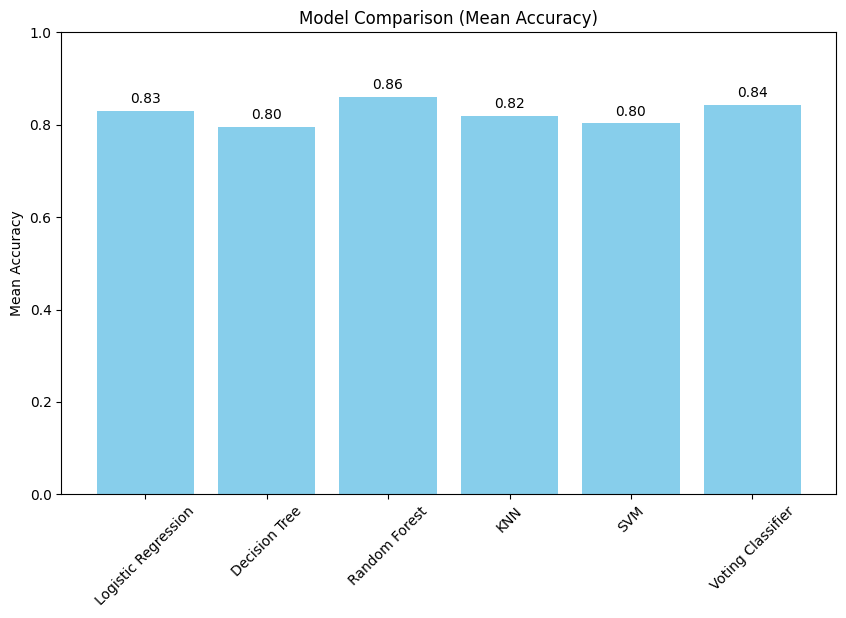

In [130]:
import matplotlib.pyplot as plt

# Extract model names and mean accuracies
model_names = list(results.keys())
mean_accuracies = [results[name][0] for name in model_names]

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(model_names, mean_accuracies, color='skyblue')
plt.ylim(0,1)
plt.title("Model Comparison (Mean Accuracy)")
plt.ylabel("Mean Accuracy")
plt.xticks(rotation=45)

# Annotate accuracy on top of bars
for bar, acc in zip(bars, mean_accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{acc:.2f}", ha='center', va='bottom')

plt.show()


In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

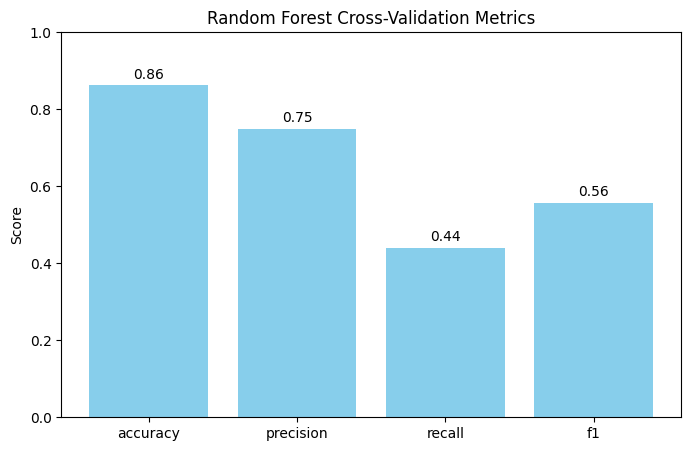

In [133]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

# 5-fold CV scores for multiple metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
cv_results = {}

for metric in scoring_metrics:
    scores = cross_val_score(rf_clf, X, y, cv=5, scoring=metric)
    cv_results[metric] = scores.mean()

# Plotting
plt.figure(figsize=(8,5))
bars = plt.bar(cv_results.keys(), cv_results.values(), color='skyblue')
plt.ylim(0,1)
plt.title("Random Forest Cross-Validation Metrics")
plt.ylabel("Score")

# Annotate values on bars
for bar, score in zip(bars, cv_results.values()):
    plt.text(bar.get_x() + bar.get_width()/2, score + 0.01, f"{score:.2f}", ha='center', va='bottom')

plt.show()
